# This notebook demos Python data visualizations on the Iris dataset

## Description 
We'll use three libraries for this tutorial: pandas, matplotlib, and seaborn.

In [9]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white" , color_codes=True)

In [6]:
iris = pd.read_csv("C:/Users/bidis/OneDrive/Desktop/web_scraping/iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Let's see how many examples we have of each species

In [8]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### The first way we can plot things is using the .plot extension from Pandas dataframes
### We'll use this to make a scatterplot of the Iris features.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

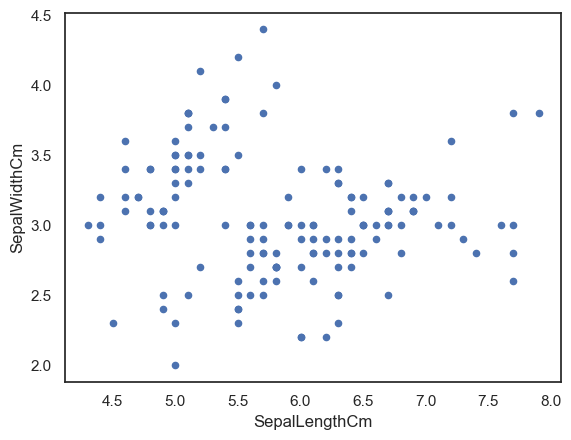

In [10]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

### We can also use the seaborn library to make a similar plot
### A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

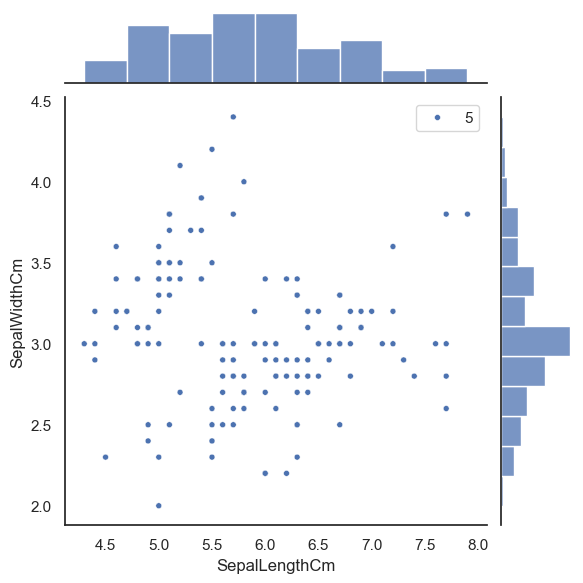

In [11]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

### One piece of information missing in the plots above is what species each plant is
### We'll use seaborn's FacetGrid to color the scatterplot by species

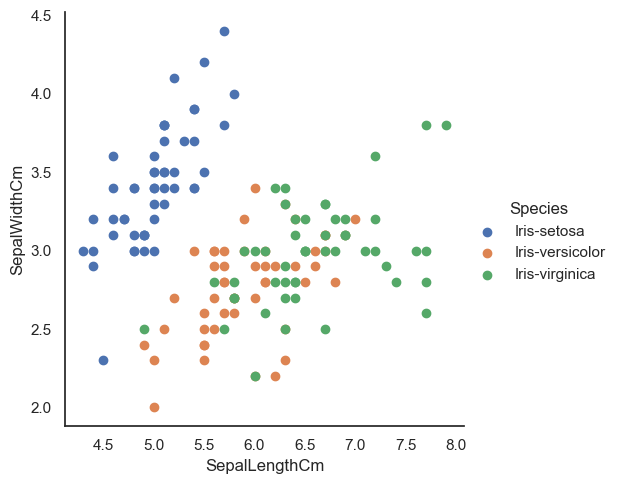

In [15]:
sns.FacetGrid(iris, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show()

### We can look at an individual feature in Seaborn through a boxplot

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

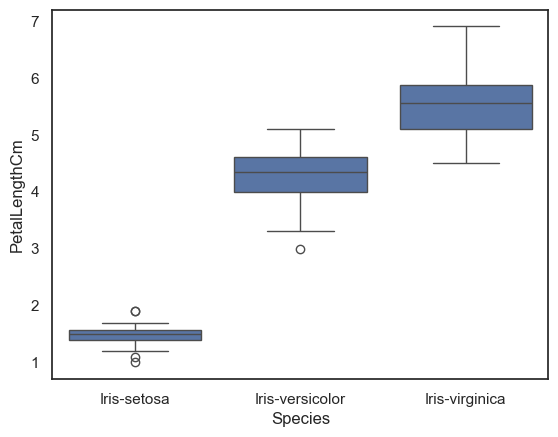

In [16]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

### One way we can extend this plot is adding a layer of individual points on top of
### it through Seaborn's striplot
### We'll use jitter=True so that all the points don't fall in single vertical lines
### above the species
### Saving the resulting axes as ax each time causes the resulting plot to be shown
### on top of the previous axes

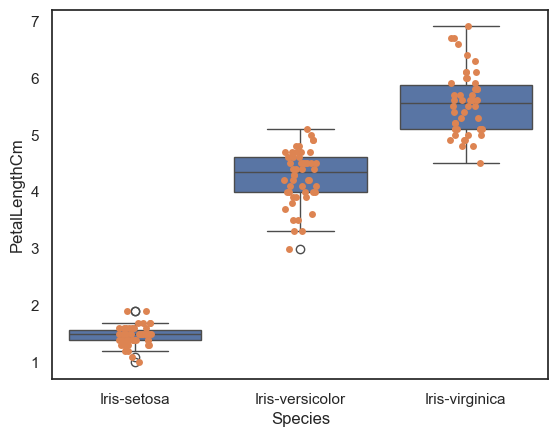

In [18]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

### A violin plot combines the benefits of the previous two plots and simplifies them
### Denser regions of the data are fatter, and sparser thiner in a violin plot

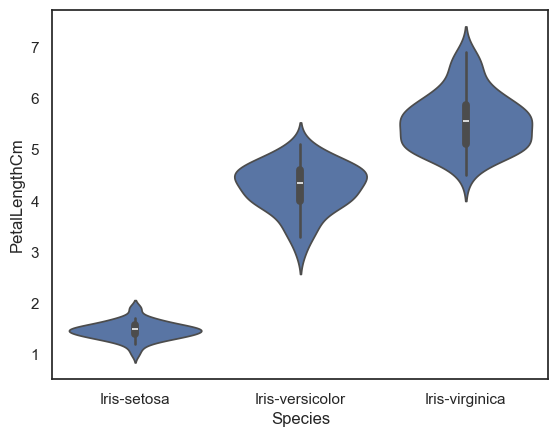

In [20]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, scale="width")
plt.show()

### A final seaborn plot useful for looking at univariate relations is the kdeplot,
### which creates and visualizes a kernel density estimate of the underlying feature

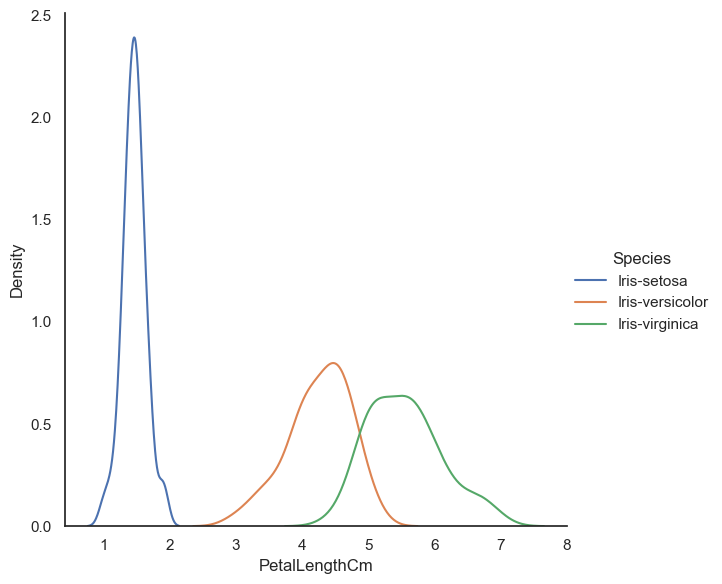

In [22]:
sns.FacetGrid(iris, hue="Species", height=6) \
    .map(sns.kdeplot, "PetalLengthCm") \
    .add_legend()

plt.show()

### Another useful seaborn plot is the pairplot, which shows the bivariate relation
### between each pair of features
### From the pairplot, we'll see that the Iris-setosa species is separataed from the other
### two across all feature combinations

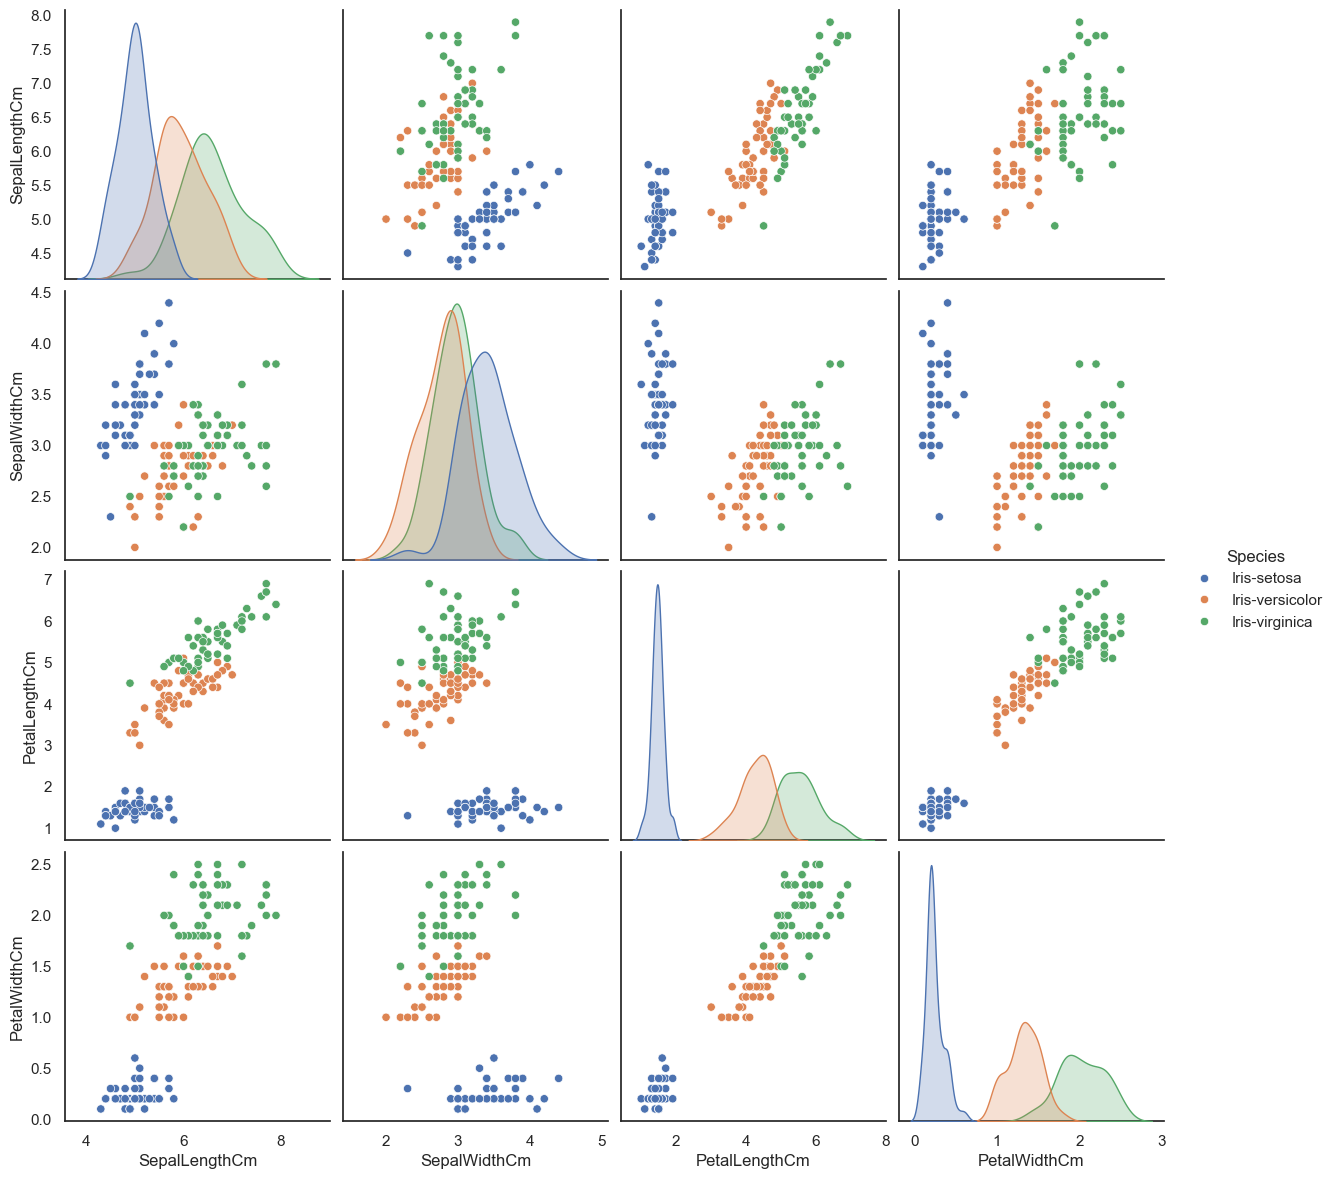

In [23]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

### The diagonal elements in a pairplot show the histogram by default
### We can update these elements to show other things, such as a kde

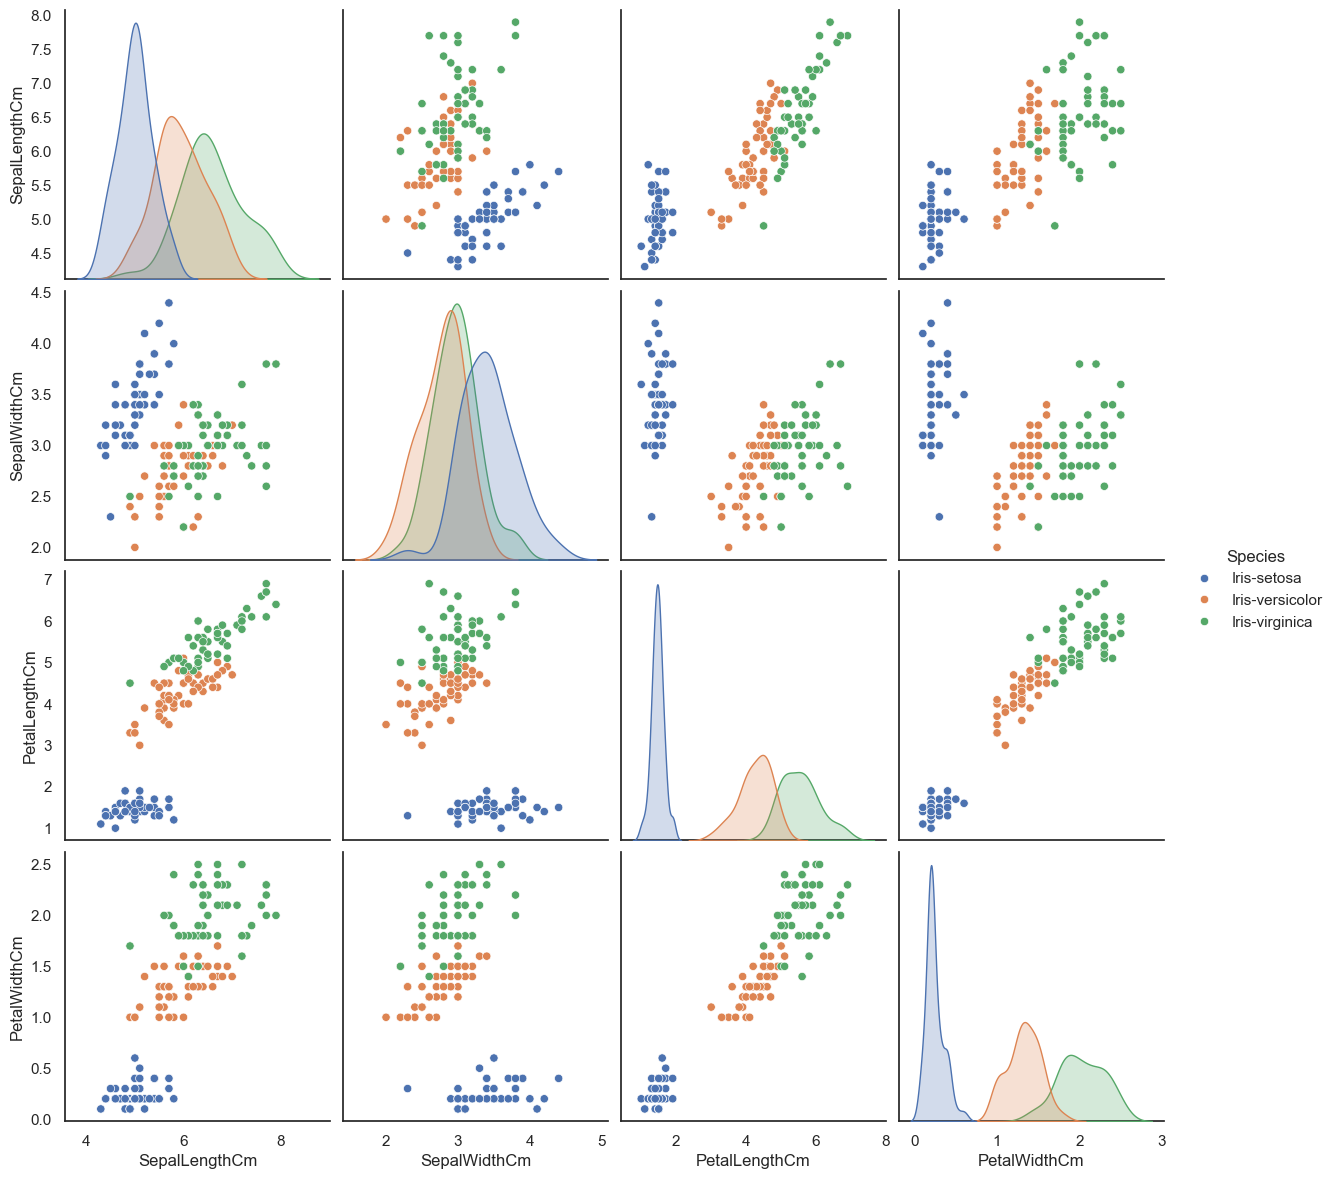

In [24]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

### Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
### We can quickly make a boxplot with Pandas on each feature split out by species

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

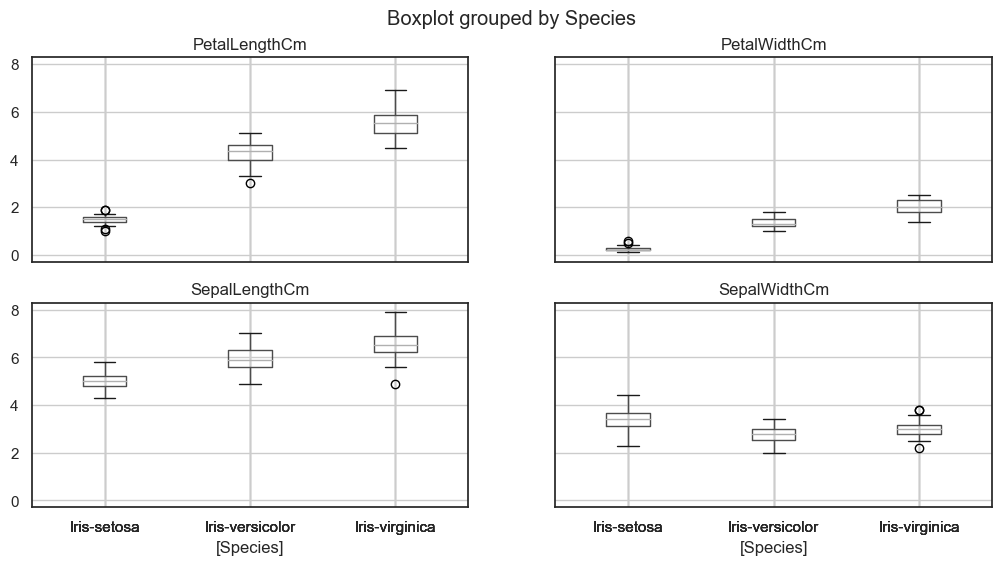

In [25]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

### One cool more sophisticated technique pandas has available is called Andrews Curves
### Andrews Curves involve using attributes of samples as coefficients for Fourier series
### and then plotting these

In [27]:
sns.set(style="white", color_codes=True)
sns.andrews_curves(iris.drop("Id", axis=1), "Species")
plt.show()

AttributeError: module 'seaborn' has no attribute 'andrews_curves'